# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "combined"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,organism,lexmatch
1,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,head,lexmatch
2,FBbt:00000034,egg,skos:exactMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,lexmatch
3,FBbt:00000092,primordial germ cell,skos:exactMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,lexmatch
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
1070,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:exactMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,lexmatch
1072,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,lexmatch
1073,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal failure,lexmatch
1074,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,chronic renal failure,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label  \
subject_match_field   object_match_field                                 
oio:hasBroadSynonym   oio:hasExactSynonym             8              8   
                      oio:hasRelatedSynonym           8              8   
                      rdfs:label                     28             28   
oio:hasDbXref         oio:hasDbXref                 110            110   
                      oio:hasDbXref-INVERSE           9              9   
oio:hasDbXref-INVERSE oio:hasDbXref                  12             12   
                      oio:hasDbXref-INVERSE          10             10   
oio:hasExactSynonym   oio:hasBroadSynonym            10             10   
                      oio:hasExactSynonym           146            146   
                      oio:hasRelatedSynonym          33             33   
                      rdfs:label                    145            145   
oio:hasNarrowSynonym  oio:hasExactSynonym             5              5   
                      oio:hasNarrowSynonym            1              1   
                      oio:hasRelatedSynonym           2              2   
                      rdfs:label                      6              6   
oio:hasRelatedSynonym oio:hasExactSynonym            52             52   
                      oio:hasNarrowSynonym            2              2   
                      oio:hasRelatedSynonym          23             23   
                      rdfs:label                     35             35   
rdf:ID                oio:hasDbXref-INVERSE          25             25   
rdfs:label            oio:hasBroadSynonym             1              1   
                      oio:hasExactSynonym            26             26   
                      oio:hasRelatedSynonym          23             23   
                      rdfs:label                    199            199   

                                             predicate_id  object_id  \
subject_match_field   object_match_field                               
oio:hasBroadSynonym   oio:hasExactSynonym               8          8   
                      oio:hasRelatedSynonym             8          8   
                      rdfs:label                       28         28   
oio:hasDbXref         oio:hasDbXref                   110        110   
                      oio:hasDbXref-INVERSE             9          9   
oio:hasDbXref-INVERSE oio:hasDbXref                    12         12   
                      oio:hasDbXref-INVERSE            10         10   
oio:hasExactSynonym   oio:hasBroadSynonym              10         10   
                      oio:hasExactSynonym             146        146   
                      oio:hasRelatedSynonym            33         33   
                      rdfs:label                      145        145   
oio:hasNarrowSynonym  oio:hasExactSynonym               5          5   
                      oio:hasNarrowSynonym              1          1   
                      oio:hasRelatedSynonym             2          2   
                      rdfs:label                        6          6   
oio:hasRelatedSynonym oio:hasExactSynonym              52         52   
                      oio:hasNarrowSynonym              2          2   
                      oio:hasRelatedSynonym            23         23   
                      rdfs:label                       35         35   
rdf:ID                oio:hasDbXref-INVERSE            25         25   
rdfs:label            oio:hasBroadSynonym               1          1   
                      oio:hasExactSynonym              26         26   
                      oio:hasRelatedSynonym            23         23   
                      rdfs:label                      199        199   

                                             object_label  \
subject_match_field   object_match_field                    
oio:hasBroadSynonym   oio:hasExactSynonym               8   
                      oio:hasRelatedSynonym             8   
   

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000468,curated
4,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000468,curated
20,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000033,curated
24,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000033,curated
40,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,curated
...,...,...,...,...,...,...,...,...,...,...,...,...
2746,MONDO:0018492,hereditary clear cell renal cell carcinoma,skos:exactMatch,NCIT:C36260,Hereditary Clear Cell Renal Cell Carcinoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0018492,curated
2751,MONDO:0019005,nephronophthisis,skos:exactMatch,NCIT:C123200,Nephronophthisis,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0019005,curated
2759,MONDO:0020642,polycystic kidney disease,skos:exactMatch,NCIT:C75464,Polycystic Kidney Disease,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0020642,curated
2764,MONDO:0020726,"tubulointerstitial kidney disease, autosomal d...",skos:exactMatch,NCIT:C123171,Medullary Cystic Kidney Disease Type I,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0020726,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:broadMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt3
1,FBbt:00000004,head,owl:differentFrom,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt3
2,FBbt:00000034,egg,skos:exactMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt3
3,FBbt:00000092,primordial germ cell,skos:relatedMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt3
4,FBbt:00000124,epithelial cell,skos:relatedMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:narrowMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt3
666,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt3
667,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt3
668,NCIT:C80078,Chronic Kidney Disease,skos:narrowMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt4
1,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt4
2,FBbt:00000034,egg,skos:narrowMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt4
3,FBbt:00000092,primordial germ cell,skos:exactMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt4
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt4
666,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt4
667,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt4
668,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id  \
mapping_source predicate_id                                              
gpt3           owl:differentFrom         211            211        211   
               skos:broadMatch            22             22         22   
               skos:exactMatch           154            154        154   
               skos:narrowMatch           49             49         49   
               skos:relatedMatch         234            234        234   
gpt4           owl:differentFrom         270            270        270   
               skos:broadMatch             8              8          8   
               skos:exactMatch           203            203        203   
               skos:narrowMatch           40             40         40   
               skos:relatedMatch         149            149        149   

                                  object_label  mapping_justification  \
mapping_source predicate_id                                             
gpt3           owl:differentFrom           211                    211   
               skos:broadMatch              22                     22   
               skos:exactMatch             154                    154   
               skos:narrowMatch             49                     49   
               skos:relatedMatch           234                    234   
gpt4           owl:differentFrom           270                    270   
               skos:broadMatch               8                      8   
               skos:exactMatch             203                    203   
               skos:narrowMatch             40                     40   
               skos:relatedMatch           149                    149   

                                  subject_source  object_source  mapping_tool  \
mapping_source predicate_id                                                     
gpt3           owl:differentFrom             211            211           211   
               skos:broadMatch                22             22            22   
               skos:exactMatch               154            154           154   
               skos:narrowMatch               49             49            49   
               skos:relatedMatch             234            234           234   
gpt4           owl:differentFrom             270            270           270   
               skos:broadMatch                 8              8             8   
               skos:exactMatch               203            203           203   
               skos:narrowMatch               40             40            40   
               skos:relatedMatch             149            149           149   

                                  confidence  subject_match_field  \
mapping_source predicate_id                                         
gpt3           owl:differentFrom         211                  211   
               skos:broadMatch            22                   22   
               skos:exactMatch           154                  154   
               skos:narrowMatch           49                   49   
               skos:relatedMatch         234                  234   
gpt4           owl:differentFrom         270                  270   
               skos:broadMatch             8                    8   
               skos:exactMatch           203                  203   
               skos:narrowMatch           40                   40   
               skos:relatedMatch         149                  149   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                 211           211  
               skos:broadMatch                    22            22  
               skos:exactMatch                   154           154  
               skos:narrowMatch                   49            49  
               skos:relatedMatch                 234

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
1,FBbt:00003682,WBbt:0003734,0.73,skos:exactMatch,bulb,isthmus,logmap
2,FBbt:00004921,WBbt:0005319,0.73,skos:exactMatch,spermatheca,spermatheca,logmap
3,FBbt:00005173,WBbt:0005762,0.52,skos:exactMatch,thecogen cell,accessory cell,logmap
4,FBbt:00005171,WBbt:0008418,0.81,skos:exactMatch,tormogen cell,IL socket cell,logmap
...,...,...,...,...,...,...,...
396,MONDO:0003789,NCIT:C6975,0.67,skos:exactMatch,hereditary papillary renal cell carcinoma,Papillary Renal Cell Carcinoma,logmap
397,MONDO:0003789,NCIT:C9222,0.92,skos:exactMatch,hereditary papillary renal cell carcinoma,Hereditary Papillary Renal Cell Carcinoma,logmap
398,MONDO:0005342,NCIT:C35280,0.96,skos:exactMatch,IgA glomerulonephritis,Focal Glomerulonephritis,logmap
399,MONDO:0005342,NCIT:C34643,0.61,skos:exactMatch,IgA glomerulonephritis,IgA Nephropathy,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
4,FBbt:00005171,WBbt:0008418,0.81,skos:exactMatch,tormogen cell,IL socket cell,logmap
6,FBbt:00007152,WBbt:0006929,0.88,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.86,skos:exactMatch,organ system,Organ system,logmap
14,FBbt:00004936,WBbt:0006799,0.96,skos:exactMatch,spermatocyte,spermatocyte,logmap
...,...,...,...,...,...,...,...
391,MONDO:0003321,NCIT:C8496,1.05,skos:exactMatch,hereditary Wilms tumor,Hereditary Kidney Wilms Tumor,logmap
392,MONDO:0007671,NCIT:C187984,0.87,skos:exactMatch,fibronectin glomerulopathy,Glomerulopathy with Fibronectin Deposits-2,logmap
394,MONDO:0019006,NCIT:C122796,0.85,skos:exactMatch,familial idiopathic steroid-resistant nephroti...,Idiopathic Nephrotic Syndrome,logmap
397,MONDO:0003789,NCIT:C9222,0.92,skos:exactMatch,hereditary papillary renal cell carcinoma,Hereditary Papillary Renal Cell Carcinoma,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.4904458598726115, 0.5, 0.48125)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.75, 0.526595744680851),
 (0.72, 0.5255474452554744),
 (0.73, 0.525),
 (0.74, 0.5241730279898219),
 (0.71, 0.5215311004784688)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
4,FBbt:00005171,WBbt:0008418,0.81,skos:exactMatch,tormogen cell,IL socket cell,logmap
6,FBbt:00007152,WBbt:0006929,0.88,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.86,skos:exactMatch,organ system,Organ system,logmap
12,FBbt:00004857,WBbt:0005747,0.77,skos:exactMatch,reproductive system,reproductive system,logmap
...,...,...,...,...,...,...,...
391,MONDO:0003321,NCIT:C8496,1.05,skos:exactMatch,hereditary Wilms tumor,Hereditary Kidney Wilms Tumor,logmap
392,MONDO:0007671,NCIT:C187984,0.87,skos:exactMatch,fibronectin glomerulopathy,Glomerulopathy with Fibronectin Deposits-2,logmap
394,MONDO:0019006,NCIT:C122796,0.85,skos:exactMatch,familial idiopathic steroid-resistant nephroti...,Idiopathic Nephrotic Syndrome,logmap
397,MONDO:0003789,NCIT:C9222,0.92,skos:exactMatch,hereditary papillary renal cell carcinoma,Hereditary Papillary Renal Cell Carcinoma,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.340,0.210,0.881
1,logmap,0.527,0.458,0.619
2,gpt3,0.490,0.500,0.481
3,gpt4,0.672,0.601,0.762


In [18]:
import matplotlib.pyplot as plt

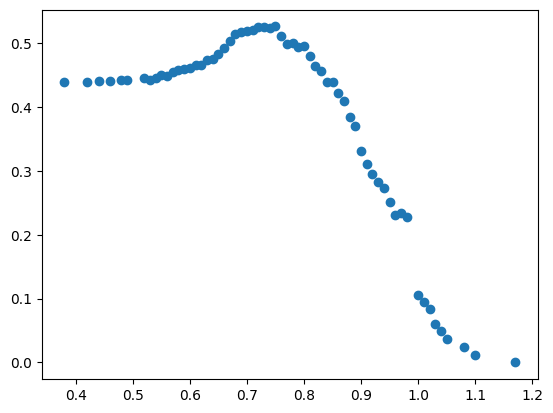

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


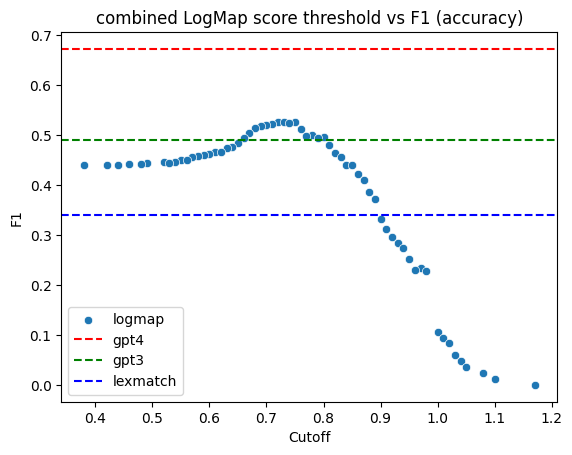

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.png", format='png')
plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('FBbt:00000001', 'organism', 'ZFA:0001094', 'whole organism'),
 ('FBbt:00000440', 'proctodeum', 'WBbt:0006795', 'proctodeum'),
 ('FBbt:00001061', 'ventral neurectoderm', 'ZFA:0001120', 'neuroectoderm'),
 ('FBbt:00001102',
  'larval ventral nerve cord',
  'WBbt:0005829',
  'ventral nerve cord'),
 ('FBbt:00001408', 'neuroblast X', 'WBbt:0008594', 'neuroblast'),
 ('FBbt:00001408', 'neuroblast X', 'ZFA:0009011', 'neuroblast'),
 ('FBbt:00001454', 'RP2sib neuron', 'WBbt:0005359', 'SIB'),
 ('FBbt:00001573', 'EN neuron', 'ZFA:0009248', 'neuron'),
 ('FBbt:00002614', 'abdominal 8 spC neuron', 'WBbt:0006861', 'SPC'),
 ('FBbt:00002615', 'abdominal 8 spD neuron', 'WBbt:0007805', 'SPD'),
 ('FBbt:00003144',
  'adult posterior hindgut',
  'ZFA:0000706',
  'posterior intestine'),
 ('FBbt:00004055',
  'adult dorsal prothoracic nerve',
  'ZFA:0005663',
  'dorsal spinal nerve'),
 ('FBbt:00004103', 'ventral group vA neuron', 'WBbt:0005339', 'VA neuron'),
 ('FBbt:00004179', 'sacculus', 'ZFA:0000428', 'sac